<a href="https://colab.research.google.com/github/Glasiermedic/Make-your-own-neural-network/blob/master/attractive_celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
!pip3 install seaborn==0.9.0

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('white')


In [0]:
celebs = pd.read_csv("https://raw.githubusercontent.com/Glasiermedic/Make-your-own-neural-network/master/list_attr_celeba.csv")

In [0]:
celeb = celebs.sample(frac=0.2)

In [4]:
celeb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40520 entries, 105778 to 49066
Data columns (total 41 columns):
image_id               40520 non-null object
5_o_Clock_Shadow       40520 non-null int64
Arched_Eyebrows        40520 non-null int64
Attractive             40520 non-null int64
Bags_Under_Eyes        40520 non-null int64
Bald                   40520 non-null int64
Bangs                  40520 non-null int64
Big_Lips               40520 non-null int64
Big_Nose               40520 non-null int64
Black_Hair             40520 non-null int64
Blond_Hair             40520 non-null int64
Blurry                 40520 non-null int64
Brown_Hair             40520 non-null int64
Bushy_Eyebrows         40520 non-null int64
Chubby                 40520 non-null int64
Double_Chin            40520 non-null int64
Eyeglasses             40520 non-null int64
Goatee                 40520 non-null int64
Gray_Hair              40520 non-null int64
Heavy_Makeup           40520 non-null int64
High_

In [5]:
celeb.columns


Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [0]:
celeb = celeb.drop(['image_id'], axis = 1)


In [0]:
kfolds = StratifiedShuffleSplit(n_splits =10, random_state=1)

In [0]:
scaler = MinMaxScaler(copy=True, feature_range=(-1, 1))
celeb_scal = scaler.fit_transform(celeb)
celeb_1 = pd.DataFrame(celeb_scal)

In [0]:
celebs = celebs.drop(['image_id'], axis = 1)
celebs_scal = scaler.fit_transform(celebs)
celebs1 =pd.DataFrame(celebs_scal)

In [0]:
celeb_1.columns = celeb.columns

In [11]:
celeb_1.describe()


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000,40520.000000
mean,-0.776160,-0.466140,0.025420,-0.589191,-0.953011,-0.695706,-0.515005,-0.531096,-0.521964,-0.704492,-0.897285,-0.597137,-0.718559,-0.886377,-0.905133,-0.867325,-0.875469,-0.917423,-0.230355,-0.088746,-0.164561,-0.033613,-0.920434,-0.766782,0.669497,-0.436772,-0.917029,-0.446347,-0.838203,-0.871471,-0.887315,-0.035587,-0.584205,-0.362734,-0.628134,-0.903751,-0.059674,-0.751678,-0.856466,0.549408
std,0.630544,0.884722,0.999689,0.808004,0.302940,0.718336,0.857198,0.847322,0.852978,0.709721,0.441457,0.802149,0.695475,0.462970,0.425133,0.497749,0.483280,0.397917,0.973119,0.996067,0.986379,0.999447,0.390902,0.641916,0.742824,0.899583,0.398826,0.894871,0.545365,0.490453,0.461170,0.999379,0.811616,0.931904,0.778115,0.428063,0.998230,0.659538,0.516210,0.835565
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,-1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


for col in celeb_1:
  sns_plot = sns.distplot(celeb_1[col], label = col)
  #plt.title(col)
  plt.show()

%%time

plt.figure(figsize=(15,5))
for item in celeb_1.columns:
  plt.figure(figsize=(15,5))
  sns.scatterplot(x =celeb_1[item], y = celeb_1['Attractive'])
  plt.title(item)
  plt.show()

In [0]:
X = celeb_1.drop(['Attractive'], axis = 1)
Y = celeb_1['Attractive']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest = RandomForestClassifier( n_jobs=-1, class_weight='balanced', n_estimators = 500, max_features = 7, max_depth=12, random_state = 1)

print(cross_val_score(forest,X_train, y_train, cv=kfolds, scoring = 'recall', verbose = 2))
pred_y_sklearn =cross_val_predict(forest, X_test, y_test, cv=10)
y_true = y_test
y_pred = cross_val_predict(forest, X_test, y_test, cv=10)
print('Confusion Matrix')
print(confusion_matrix(y_pred, y_true))
print(pd.crosstab(pred_y_sklearn, y_test))
print("")
print(classification_report(y_pred, y_true))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=  10.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV] ................................................. , total=   9.2s
[CV]  ................................................................
[CV] ................................................. , total=   9.2s
[CV]  ................................................................
[CV] ................................................. , total=   9.3s
[CV]  ................................................................
[CV] ................................................. , total=   8.9s
[CV]  ................................................................
[CV] ................................................. , total=   9.2s
[CV]  ................................................................
[CV] ................................................. , total=   9.0s
[CV]  ................................................................
[CV] ................................................. , total=   9.2s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.5min finished


Confusion Matrix
[[3092  979]
 [ 838 3195]]
Attractive  -1.0   1.0
row_0                 
-1.0        3092   979
 1.0         838  3195

              precision    recall  f1-score   support

        -1.0       0.79      0.76      0.77      4071
         1.0       0.77      0.79      0.78      4033

    accuracy                           0.78      8104
   macro avg       0.78      0.78      0.78      8104
weighted avg       0.78      0.78      0.78      8104



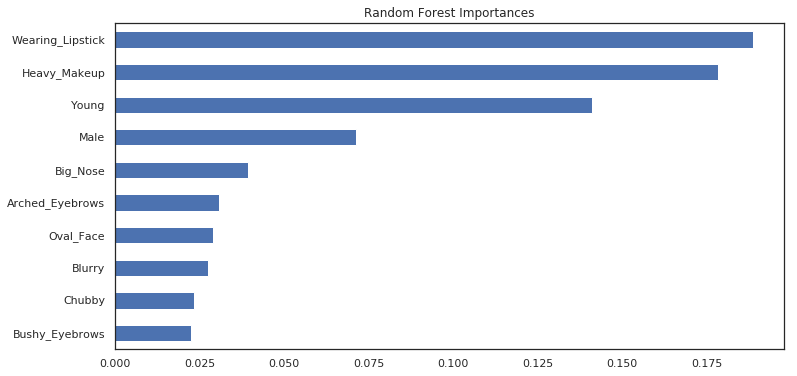

In [16]:
forest.fit(X_train, y_train)
importances_for = forest.feature_importances_

indices = np.argsort(importances_for)[::-1]
for_imp_feat = []

for f in range(X.shape[1]):
    for_imp_feat.append(X.columns[indices[f]])

importances_df = pd.Series(importances_for, index=X.columns)
importances_df.nlargest(10).sort_values().plot(kind='barh', figsize=(12, 6)) 
plt.title("Random Forest Importances")
plt.show()

In [0]:
X = celeb_1.drop(['Attractive'], axis = 1)
X_2 = X[list(for_imp_feat)[:20]]
Y = celeb_1['Attractive']

X3 =celebs.drop(['Attractive'],axis =1)
Y3 =celebs['Attractive']

In [0]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, Y, test_size=0.2, random_state=1)

In [0]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=1)

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier

In [0]:
mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=(5,100,5), activation='relu', solver='sgd', 
                    learning_rate='adaptive', warm_start=True,  verbose = 1,
                    max_iter = 50, random_state=1, tol=0.0001)
#mlp.fit(X_train, y_train)
#mlp.score(X_test, y_test)

In [0]:
#cross_val_score(mlp, X, Y, cv=kfolds, verbose = 1)

In [0]:
alpha_list = [ .01, .05]
layer_lists = [(5,100,5),(100,)]
parameters = {'alpha':alpha_list, 'hidden_layer_sizes': layer_lists,
                    'solver': [ 'sgd', 'adam']}
 #if marked out once it has ran and the best estimator is identified.  The best estimator is then put into the mlp algorithm below for the final model
#mlp_grid = GridSearchCV(mlp, parameters, cv=kfolds, scoring='neg_mean_squared_error')
#mlp_grid.fit(X3_train,y3_train)        
#print (mlp_grid.best_estimator_)
#print(np.sqrt(-mlp_grid.best_score_))

In [0]:
mlp = MLPClassifier(alpha=0.01, hidden_layer_sizes=(5,100,5), activation='relu', solver='sgd', 
                    learning_rate='adaptive', warm_start=True,  verbose = 1,
                    max_iter = 200, random_state=1, tol=0.0001)
#mlp.fit(X_train, y_train)
#mlp.score(X_test, y_test)

In [25]:
print(cross_val_score(mlp,X2_train, y2_train, cv=kfolds, scoring = 'neg_mean_squared_error', verbose = 1))
pred2_y_sklearn =cross_val_predict(mlp, X2_test, y2_test, cv=2)
y2_true = y_test
y2_pred = cross_val_predict(mlp, X2_test, y2_test, cv=10)
print('Confusion Matrix')
print(confusion_matrix(y2_pred, y2_true))
print(pd.crosstab(pred2_y_sklearn, y2_test))
print("")
print(classification_report(y2_pred, y2_true))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Iteration 1, loss = 0.65424445
Iteration 2, loss = 0.60965575
Iteration 3, loss = 0.57767594
Iteration 4, loss = 0.55590159
Iteration 5, loss = 0.53986725
Iteration 6, loss = 0.52735279
Iteration 7, loss = 0.51755023
Iteration 8, loss = 0.50968952
Iteration 9, loss = 0.50330606
Iteration 10, loss = 0.49806658
Iteration 11, loss = 0.49373783
Iteration 12, loss = 0.49004081
Iteration 13, loss = 0.48722446
Iteration 14, loss = 0.48460327
Iteration 15, loss = 0.48243799
Iteration 16, loss = 0.48054429
Iteration 17, loss = 0.47891378
Iteration 18, loss = 0.47751283
Iteration 19, loss = 0.47617962
Iteration 20, loss = 0.47501378
Iteration 21, loss = 0.47392054
Iteration 22, loss = 0.47285488
Iteration 23, loss = 0.47182140
Iteration 24, loss = 0.47099454
Iteration 25, loss = 0.47003736
Iteration 26, loss = 0.46920794
Iteration 27, loss = 0.46836984
Iteration 28, loss = 0.46768595
Iteration 29, loss = 0.46693923
Iteration 30, loss = 0.46635716
Iteration 31, loss = 0.46568615
Iteration 32, los

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.6min finished


Iteration 2, loss = 0.66804421
Iteration 3, loss = 0.65965618
Iteration 4, loss = 0.65169187
Iteration 5, loss = 0.64403151
Iteration 6, loss = 0.63716720
Iteration 7, loss = 0.63047763
Iteration 8, loss = 0.62428516
Iteration 9, loss = 0.61842941
Iteration 10, loss = 0.61290918
Iteration 11, loss = 0.60769708
Iteration 12, loss = 0.60251474
Iteration 13, loss = 0.59764551
Iteration 14, loss = 0.59298194
Iteration 15, loss = 0.58861423
Iteration 16, loss = 0.58430630
Iteration 17, loss = 0.58026027
Iteration 18, loss = 0.57660347
Iteration 19, loss = 0.57309505
Iteration 20, loss = 0.56987123
Iteration 21, loss = 0.56663809
Iteration 22, loss = 0.56373407
Iteration 23, loss = 0.56097208
Iteration 24, loss = 0.55837942
Iteration 25, loss = 0.55590634
Iteration 26, loss = 0.55351426
Iteration 27, loss = 0.55122680
Iteration 28, loss = 0.54905671
Iteration 29, loss = 0.54699631
Iteration 30, loss = 0.54493047
Iteration 31, loss = 0.54288515
Iteration 32, loss = 0.54087744
Iteration 33, lo